### Project Case Scenario
Project Scenario: You are a Data Scientist with a housing agency in Boston MA, you have been given access to a previous dataset on housing prices derived from the U.S. Census Service to present insights to higher management. Based on your experience in Statistics, what information can you provide them to help with making an informed decision? Upper management will like to get some insight into the following.

-Is there a significant difference in the median value of houses bounded by the Charles river or not?

-Is there a difference in median values of houses of each proportion of owner-occupied units built before 1940?

-Can we conclude that there is no relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town?

-What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes?

Using the appropriate graphs and charts, generate basic statistics and visualizations that you think will be useful for the upper management to give them important insight given the question they are asking, in your graphs, include an explanation of each statistic. 

#### The following describes the dataset variables:

·      CRIM - per capita crime rate by town

·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

·      INDUS - proportion of non-retail business acres per town.

·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

·      NOX - nitric oxides concentration (parts per 10 million)

·      RM - average number of rooms per dwelling

·      AGE - proportion of owner-occupied units built prior to 1940

·      DIS - weighted distances to five Boston employment centres

·      RAD - index of accessibility to radial highways

·      TAX - full-value property-tax rate per $10,000

·      PTRATIO - pupil-teacher ratio by town

·      LSTAT - % lower status of the population

·      MEDV - Median value of owner-occupied homes in $1000's

In [90]:
#importing
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
import statsmodels.api as sm
%matplotlib inline

In [91]:
#importing data set and loading it into a data frame using pandas
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

In [92]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


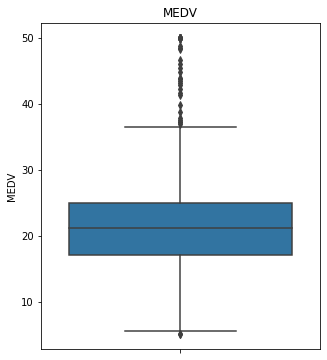

In [93]:
#For the "Median value of owner-occupied homes" provide a boxplot
plt.figure(figsize=(5,6))
plt.title("MEDV")
ax= sns.boxplot(y= 'MEDV', data = boston_df)

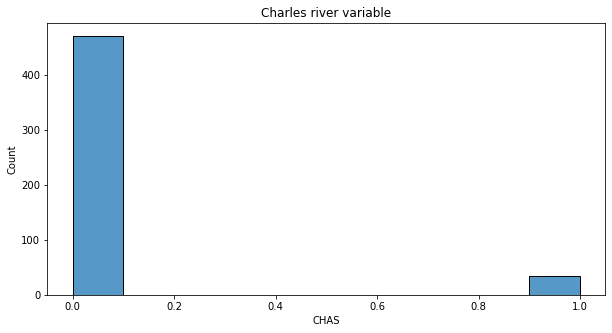

In [94]:
#Provide a  histogram for the Charles river variable
plt.figure(figsize=(10,5))
plt.title('Charles river variable')
ax = sns.histplot(x= 'CHAS', data = boston_df)

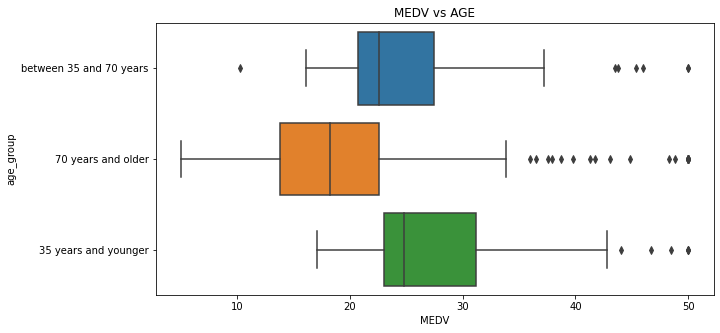

In [95]:
#Provide a boxplot for the MEDV variable vs the AGE variable.
boston_df.loc[(boston_df["AGE"] <= 35),'age_group'] = '35 years and younger'
boston_df.loc[(boston_df["AGE"] > 35) & (boston_df["AGE"]<70),'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df["AGE"] >= 70),'age_group'] = '70 years and older'
plt.figure(figsize=(10,5))
sns.boxplot(x=boston_df.MEDV, y=boston_df.age_group, data=boston_df)
plt.title("MEDV vs AGE")
plt.show()

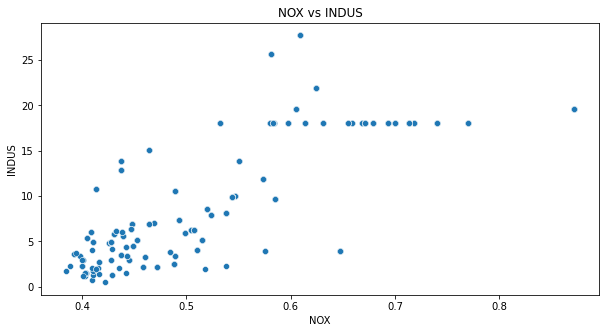

In [96]:
#Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of 
#non-retail business acres per town. 
plt.figure(figsize=(10,5))
plt.title("NOX vs INDUS")
ax = sns.scatterplot(x=boston_df.NOX, y=boston_df.INDUS, data=boston_df)

## What can you say about the relationship?
#### There is a correlation bettween the two variables up until 0.6

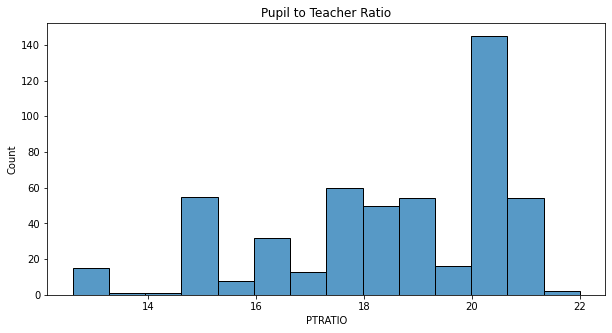

In [97]:
#Create a histogram for the pupil to teacher ratio variable
plt.figure(figsize=(10,5))
plt.title('Pupil to Teacher Ratio')
ax = sns.histplot(x= 'PTRATIO', data = boston_df)

### Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

H0: Both average MEDV are the same

H1: Both average MEDV are NOT the same

In [98]:
a = boston_df[boston_df["CHAS"] == 0]["MEDV"]
b = boston_df[boston_df["CHAS"] == 1]["MEDV"]
scipy.stats.ttest_ind(a,b,axis=0,equal_var=True)

Ttest_indResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05)

Since p value is greather than alpha (0.05), we failed to reject null hypothesis since there's no statistical significance.

### Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

H0: the three population means are equal


H1: one of the means (or more) is not equal to the others

In [99]:
a = boston_df[boston_df["age_group"] == '35 years and younger']["MEDV"]
b = boston_df[boston_df["age_group"] == 'between 35 and 70 years']["MEDV"]
c = boston_df[boston_df["age_group"] == '70 years and older']["MEDV"]
f_stats, p_value = scipy.stats.f_oneway(a,b,c,axis=0)
print("F-Statistic={0}, P-value={1}".format(f_stats,p_value))

F-Statistic=36.40764999196599, P-value=1.7105011022702984e-15


Since p value is greather than alpha (0.05), we failed to reject null hypothesis since there's no statistical significance.

### Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)


H0: NOX is not correlated to INDUS

H1: NOX is correlated to INDUS

In [100]:
pearson,p_value = scipy.stats.pearsonr(boston_df["NOX"],boston_df["INDUS"])

In [101]:
print("Pearson Coefficient value={0}, P-value={1}".format(pearson,p_value))

Pearson Coefficient value=0.7636514469209151, P-value=7.913361061238693e-98


Since the p value is smaller than 0.05, we reject the Null hypothesis and conclude that there exists a relationship between Nitric Oxide and non-retail business acres per town.

### What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

H0: weighted distances to five Boston employment centres are not related to median value

H1: weighted distances to five Boston employment centres are related to median value

In [106]:
y = boston_df['MEDV']
x = boston_df['DIS']
x = sm.add_constant(x)
results = sm.OLS(y,x).fit()
results.summary()

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sat, 07 May 2022   Prob (F-statistic):           1.21e-08
Time:                        06:51:25   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [107]:
np.sqrt(0.062)

0.24899799195977465

The square root of R-squared is 0.25, which implies weak correlation between both features